## Page Rank - Assessment
In this assessment, you will be asked to produce a function that can calculate the PageRank for an arbitrarily large probability matrix.
This, the final assignment of the course, will give less guidance than previous assessments.
You will be expected to utilise code from earlier in the worksheet and re-purpose it to your needs.

### How to submit
Edit the code in the cell below to complete the assignment.
Once you are finished and happy with it, press the *Submit Assignment* button at the top of this notebook.

Please don't change any of the function names, as these will be checked by the grading script.

If you have further questions about submissions or programming assignments, here is a [list](https://www.coursera.org/learn/linear-algebra-machine-learning/discussions/weeks/1/threads/jB4klkn5EeibtBIQyzFmQg) of Q&A. You can also raise an issue on the discussion forum. Good luck!

In [60]:
# PACKAGE
# Here are the imports again, just in case you need them.
# There is no need to edit or submit this cell.
import numpy as np
import numpy.linalg as la
from readonly.PageRankFunctions import *
np.set_printoptions(suppress=True)

In [76]:
# GRADED FUNCTION
# Complete this function to provide the PageRank for an arbitrarily sized internet.
# I.e. the principal eigenvector of the damped system, using the power iteration method.
# (Normalisation doesn't matter here)
# The functions inputs are the linkMatrix, and d the damping parameter - as defined in this worksheet.
# (The damping parameter, d, will be set by the function - no need to set this yourself.)
def pageRank(linkMatrix, d) :
    n = linkMatrix.shape[0]  # Size of the internet

    # Initialize the PageRank vector with equal probability for each website
    #d * linkMatrix is contribution of link structure to transition matrix M
    #(1-d/n*np.ones.. ) represents the damping factor which models probability of user randomly jumping to another website
    M = d * linkMatrix + (1-d)/n * np.ones([n, n])

    #initialize the r with equal probabilities for all websites-100 scaling factor
    r = 100*np.ones(n) / n
     #performing 1st iteration of power iteration lastR stores pagerank vector, r updated by multiplying M with initial vector
    lastR = r

    r = M @ r
    #i keeps track of iterations
    i = 0

    while la.norm(lastR - r) > 0.01 :

        lastR = r

        r = M @ r

        i += 1

    print(str(i) + " iterations to convergence.")

    r

    return r


## Test your code before submission
To test the code you've written above, run the cell (select the cell above, then press the play button [ ▶| ] or press shift-enter).
You can then use the code below to test out your function.
You don't need to submit this cell; you can edit and run it as much as you like.

In [71]:
# Use the following function to generate internets of different sizes.
generate_internet(5)

array([[ 1. ,  0.2,  0.2,  0.2,  0.2],
       [ 0. ,  0.2,  0.2,  0.2,  0.2],
       [ 0. ,  0.2,  0.2,  0.2,  0.2],
       [ 0. ,  0.2,  0.2,  0.2,  0.2],
       [ 0. ,  0.2,  0.2,  0.2,  0.2]])

In [72]:
# Test your PageRank method against the built in "eig" method.
# You should see yours is a lot faster for large internets
L = generate_internet(10)

In [73]:
pageRank(L, 1)

128 iterations to convergence.


array([  0.02960375,   0.02981984,   0.01946793,  99.81567886,
         0.01946793,   0.01925185,   0.00904046,   0.00904046,
         0.01939237,   0.02923655])

In [74]:
# Do note, this is calculating the eigenvalues of the link matrix, L,
# without any damping. It may give different results that your pageRank function.
# If you wish, you could modify this cell to include damping.
# (There is no credit for this though)
eVals, eVecs = la.eig(L) # Gets the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Orders them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0]
100 * np.real(r / np.sum(r))

array([  0.0000003,   0.0000003,   0.0000002,  99.9999981,   0.0000002,
         0.0000002,   0.0000001,   0.0000001,   0.0000002,   0.0000003])

Populating the interactive namespace from numpy and matplotlib
38 iterations to convergence.


<IPython.core.display.Javascript object>


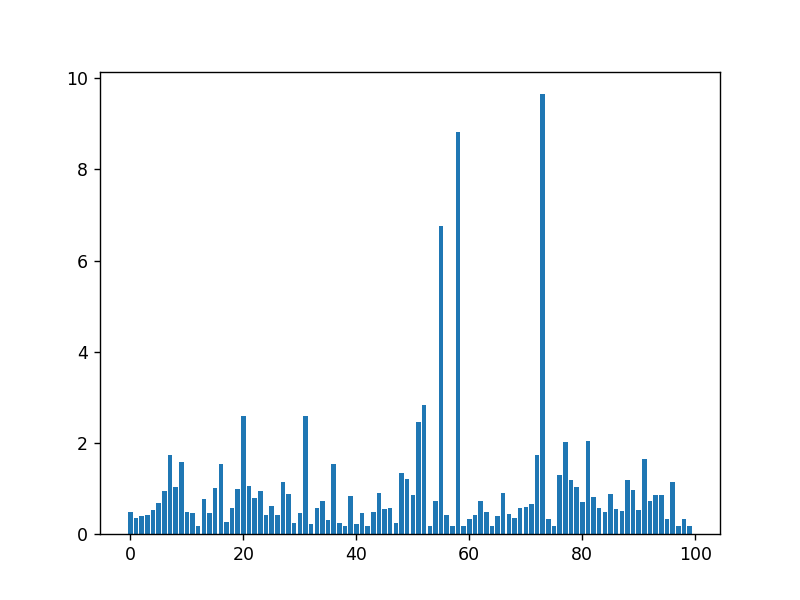

In [75]:
# You may wish to view the PageRank graphically.
# This code will draw a bar chart, for each (numbered) website on the generated internet,
# The height of each bar will be the score in the PageRank.
# Run this code to see the PageRank for each internet you generate.
# Hopefully you should see what you might expect
# - there are a few clusters of important websites, but most on the internet are rubbish!
%pylab notebook
r = pageRank(generate_internet(100), 0.9)
plt.bar(arange(r.shape[0]), r);